In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [11]:
df_ischemic = pd.read_csv("../Datasets/subjects_ischemic.csv")

In [12]:
# Filter subjects with stroke (PAT)
# - subj_type=0 means stroke
no_ischemic_subjects = df_ischemic[df_ischemic["subj_type"] == 0]["participant_id"].count()
print("Number of with ischemic subjects: ", no_ischemic_subjects)
print("The most frequent lesion site is: cortical (1)")

Number of with ischemic subjects:  106
The most frequent lesion site is: cortical (1)


<Axes: ylabel='Count'>

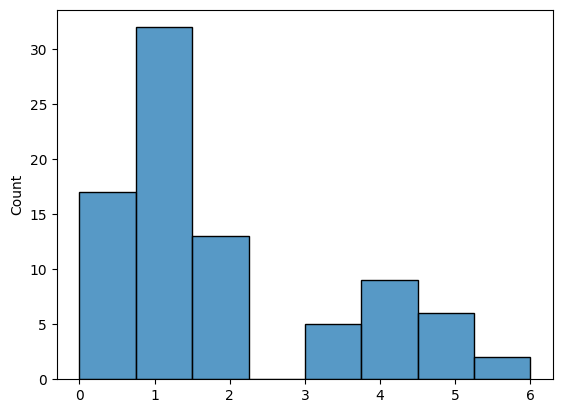

In [47]:
# Present the distribution of stroke sites
df_stroke = df_ischemic[df_ischemic["subj_type"] == 0]
sites = df_stroke[df_stroke["lesion_site"].notna()]["lesion_site"].values
sns.histplot(sites.astype(int))

## Filter the specific conditions (hemisphere, site, etc.)

In [48]:
# df_conditioned = df_ischemic[(df_ischemic["subj_type"] == 0) & ((df_ischemic["lesion_site"] == 1) | (df_ischemic["lesion_site"] == 2))]
df_conditioned = df_ischemic[(df_ischemic["subj_type"] == 0) & (df_ischemic["lesion_side"] == 0)]

In [49]:
# Collect the participants ids and convert them to .npy format
participants = list(df_conditioned["participant_id"].values)
participants = list(map(lambda x: x + ".npy", participants))
participants, len(participants)

(['sub-PAT027.npy',
  'sub-PAT029.npy',
  'sub-PAT033.npy',
  'sub-PAT035.npy',
  'sub-PAT039.npy',
  'sub-PAT041.npy',
  'sub-PAT047.npy',
  'sub-PAT049.npy',
  'sub-PAT052.npy',
  'sub-PAT055.npy',
  'sub-PAT057.npy',
  'sub-PAT060.npy',
  'sub-PAT061.npy',
  'sub-PAT062.npy',
  'sub-PAT063.npy',
  'sub-PAT064.npy',
  'sub-PAT067.npy',
  'sub-PAT070.npy',
  'sub-PAT075.npy',
  'sub-PAT077.npy',
  'sub-PAT078.npy',
  'sub-PAT079.npy',
  'sub-PAT083.npy',
  'sub-PAT085.npy',
  'sub-PAT086.npy',
  'sub-PAT089.npy',
  'sub-PAT092.npy',
  'sub-PAT095.npy',
  'sub-PAT097.npy',
  'sub-PAT099.npy',
  'sub-PAT100.npy',
  'sub-PAT101.npy',
  'sub-PAT102.npy',
  'sub-PAT104.npy',
  'sub-PAT106.npy',
  'sub-PAT112.npy',
  'sub-PAT119.npy',
  'sub-PAT120.npy',
  'sub-PAT122.npy',
  'sub-PAT124.npy',
  'sub-PAT132.npy',
  'sub-PAT136.npy',
  'sub-PAT141.npy',
  'sub-PAT142.npy',
  'sub-PAT144.npy',
  'sub-PAT149.npy',
  'sub-PAT150.npy',
  'sub-PAT153.npy',
  'sub-PAT163.npy',
  'sub-PAT168.npy',


## Save new ischemic cortical dataset partition

In [ ]:
source_dir = "../Datasets/SynapseSnap/ec-networks_23-10-00_0000/"
destination_dir = "../Datasets/SynapseSnap/directory-title/"

for file in os.listdir(source_dir):
    if file.startswith("sub-CON"):
        os.system("cp " + source_dir + file + " " + destination_dir + file)
    if file in participants:
        os.system("cp " + source_dir + file + " " + destination_dir + file)

### Validate the saved partitions

In [44]:
source_files = os.listdir(source_dir)
source_files = list(filter(lambda x: x.startswith("sub-PAT"), source_files))
len(source_files)

130

In [45]:
dest_files = os.listdir(destination_dir)
dest_files = list(filter(lambda x: x.startswith("sub-PAT"), dest_files))
len(dest_files)

49

In [46]:
# Check if any subjects are missing
# - if so, the RCC method lost some networks
set(participants) - set(source_files)

{'sub-PAT137.npy'}